In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from scipy import ndimage

In [2]:
save_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20200813_anats_grouped"
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_096',
         'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_102', 'fly_105', 'fly_106',
         'fly_110', 'fly_111']

In [294]:
flies = ['fly_91']

In [295]:
for fly in flies:
    source_path = os.path.join(dataset_path, fly, 'anat_0', 'moco', 'anat_red_clean.nii')
    target_path = os.path.join(save_dir, fly + '_anat_clean.nii')
    print(target_path)
    shutil.copy(source_path, target_path)

/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20200813_anats_grouped/fly_91_anat_clean.nii


FileNotFoundError: [Errno 2] No such file or directory: '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_91/anat_0/moco/anat_red_clean.nii'

In [291]:
import shutil

In [33]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20200811_meanbrain'

In [127]:
file = os.path.join(root_directory, 'seed_syn_1_mean.nii')
meanbrain = np.asarray(nib.load(file).get_data(), dtype='float32')

In [34]:
files = os.listdir(os.path.join(root_directory, 'syn_0'))
brains = {}

for i, file in enumerate(files):
    t0=time.time()
    print(file)
    brains[file] = np.asarray(nib.load(os.path.join(root_directory, 'syn_0', file)).get_data(), dtype='float32')
    print(time.time()-t0)    
    memory_usage = psutil.Process(os.getpid()).memory_info().rss*10**-9
    print('Current memory usage: {:.2f}GB'.format(memory_usage))

fly_092_m-to-seed_syn_1_mean.nii.nii
0.004079341888427734
Current memory usage: 0.77GB
fly_097_m-to-seed_syn_1_mean.nii.nii
0.003113269805908203
Current memory usage: 0.77GB
fly_111_m-to-seed_syn_1_mean.nii.nii
0.002914905548095703
Current memory usage: 0.77GB
fly_101_m-to-seed_syn_1_mean.nii.nii
0.002704143524169922
Current memory usage: 0.77GB
fly_089_m-to-seed_syn_1_mean.nii.nii
0.0025234222412109375
Current memory usage: 0.77GB
fly_087_m-to-seed_syn_1_mean.nii.nii
0.0024683475494384766
Current memory usage: 0.77GB
fly_099-to-seed_syn_1_mean.nii.nii
0.00244903564453125
Current memory usage: 0.77GB
fly_096-to-seed_syn_1_mean.nii.nii
0.0024182796478271484
Current memory usage: 0.77GB
fly_098-to-seed_syn_1_mean.nii.nii
0.002456188201904297
Current memory usage: 0.77GB
fly_093-to-seed_syn_1_mean.nii.nii
0.0024309158325195312
Current memory usage: 0.77GB
fly_105-to-seed_syn_1_mean.nii.nii
0.0024912357330322266
Current memory usage: 0.77GB
fly_094_m-to-seed_syn_1_mean.nii.nii
0.0023682117

In [35]:
keys = [x for x in brains.keys() if '_m-' not in x]

In [131]:
#remove fly 102 - looks a little wonky and want 15 + 1mean to fit nicely in figs
keys.remove('fly_102-to-seed_syn_1_mean.nii.nii')

In [134]:
keys.sort()

In [138]:
# add meanbrain
brains['meanbrain'] = meanbrain

In [139]:
keys.insert(0,'meanbrain')

In [140]:
keys

['meanbrain',
 'fly_087-to-seed_syn_1_mean.nii.nii',
 'fly_089-to-seed_syn_1_mean.nii.nii',
 'fly_092-to-seed_syn_1_mean.nii.nii',
 'fly_093-to-seed_syn_1_mean.nii.nii',
 'fly_094-to-seed_syn_1_mean.nii.nii',
 'fly_096-to-seed_syn_1_mean.nii.nii',
 'fly_097-to-seed_syn_1_mean.nii.nii',
 'fly_098-to-seed_syn_1_mean.nii.nii',
 'fly_099-to-seed_syn_1_mean.nii.nii',
 'fly_100-to-seed_syn_1_mean.nii.nii',
 'fly_101-to-seed_syn_1_mean.nii.nii',
 'fly_105-to-seed_syn_1_mean.nii.nii',
 'fly_106-to-seed_syn_1_mean.nii.nii',
 'fly_110-to-seed_syn_1_mean.nii.nii',
 'fly_111-to-seed_syn_1_mean.nii.nii']

In [ ]:
FB = [405:575,110:260,102]
PB = [400:575,200:300,60]
Optic_lobe = [700:925,225:425,110]
VLP = [225:375,150:300,120]
MB = [325:500,60:180,150]

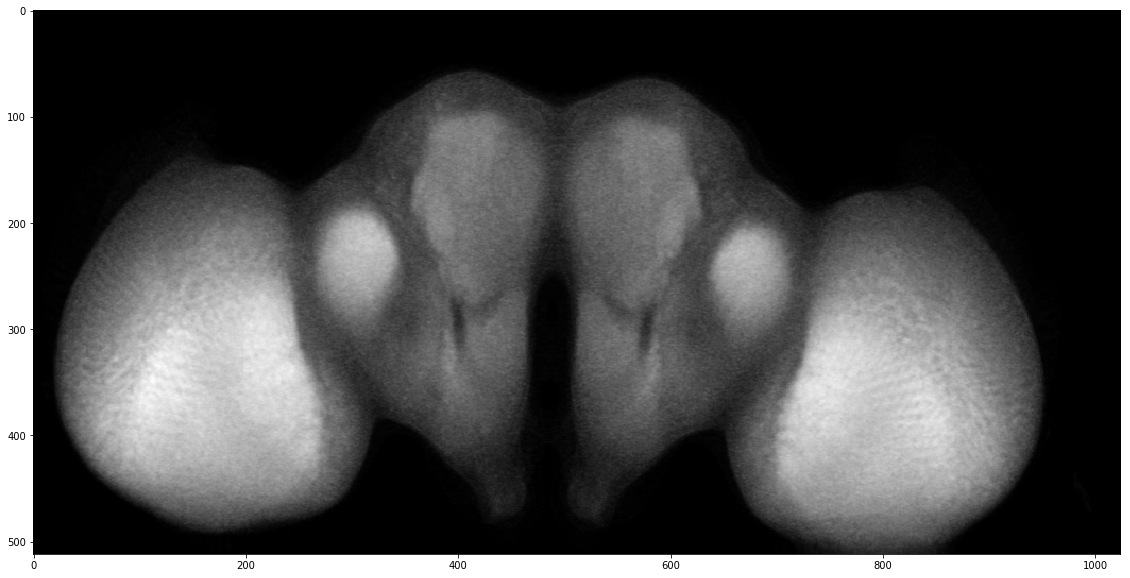

In [285]:
fig = plt.figure(figsize=(20,10))
plt.imshow(meanbrain[...,200].T,cmap='gray')
scalebar = ScaleBar(6.5*10**-7) # 1 pixel = 0.2 meter
#plt.gca().add_artist(scalebar)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

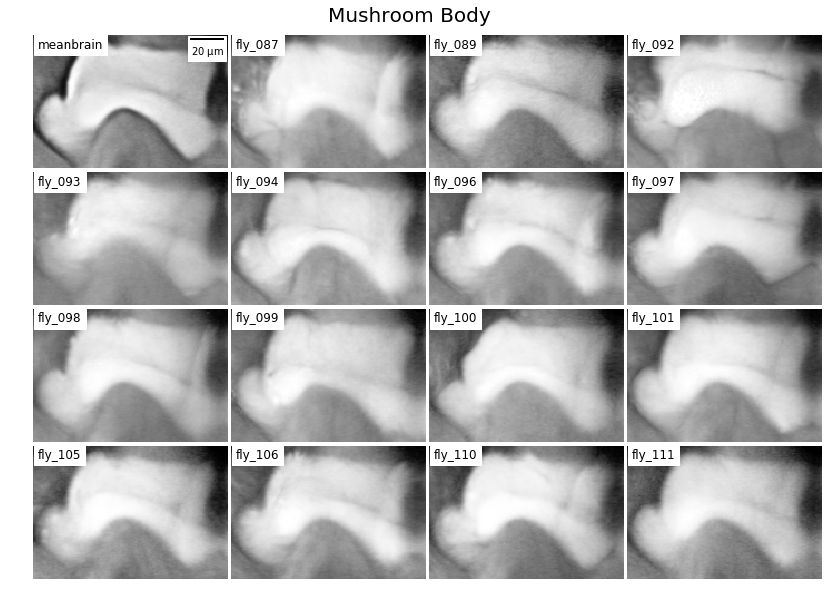

In [283]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,key in enumerate(keys):
    grid[i].imshow(brains[key][325:500,60:180,150].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s='{}'.format(key.split('-')[0]),fontsize=12,backgroundcolor='white')
    if i == 0:
        scalebar = ScaleBar(6.5*10**-7, location='upper right')
        grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

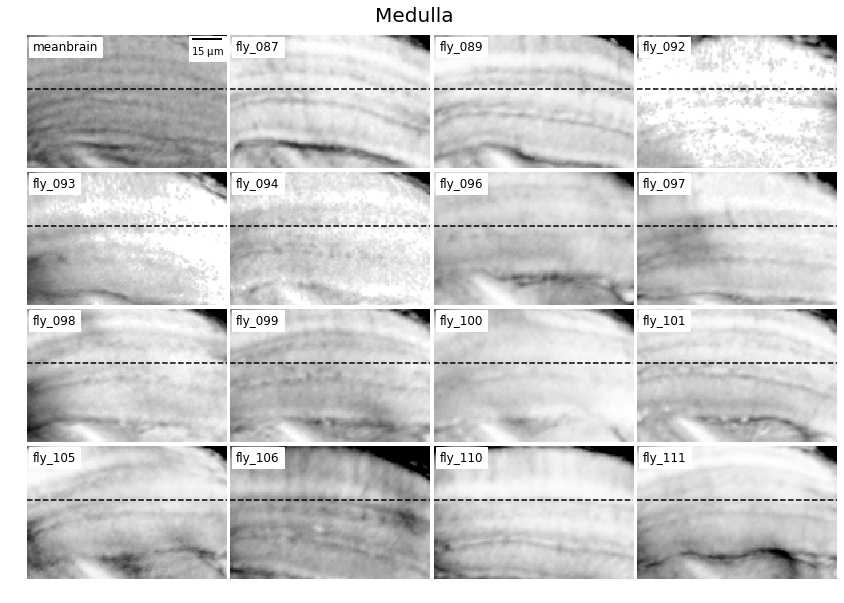

In [260]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,key in enumerate(keys):
    to_plot = ndimage.rotate(brains[key][...,110], -50)[230:330,775:925]
    grid[i].imshow(to_plot,cmap='gray',vmin=.7,vmax=1)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s='{}'.format(key.split('-')[0]),fontsize=12,backgroundcolor='white')
    if i == 0:
        scalebar = ScaleBar(6.5*10**-7, location='upper right')
        grid[i].add_artist(scalebar)
    grid[i].axhline(40,linestyle='--',color='k')
plt.suptitle(x=.5, y=.92, t='Medulla', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

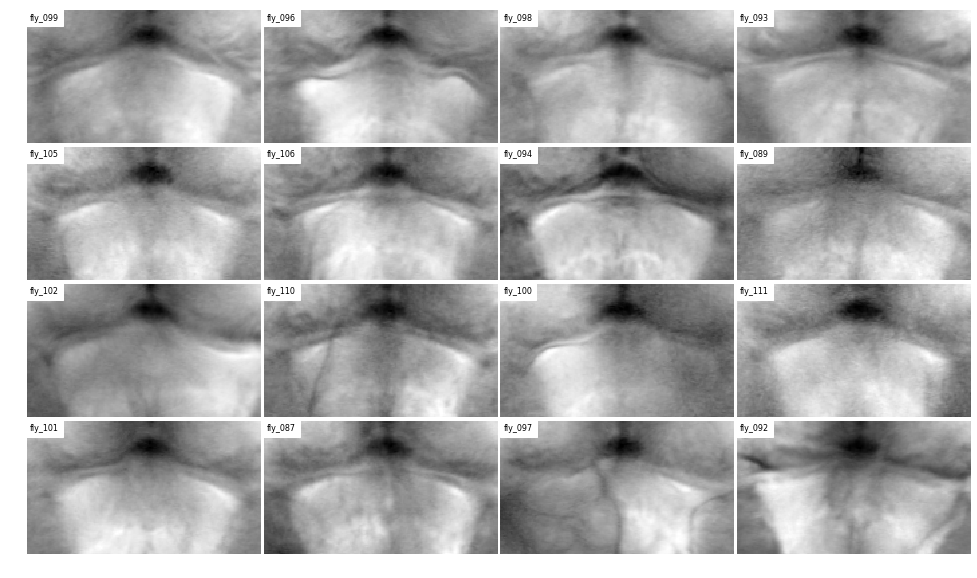

In [110]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)

for i,key in enumerate(keys):
    grid[i].imshow(brains[key][400:575,100:200,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=2,y=7,s='{}'.format(key.split('-')[0]),fontsize=8,backgroundcolor='white')